In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file = ("data/fraud_detection_train.csv")
df = pd.read_csv(file)

FileNotFoundError: ignored

Load data set fraud_detection_train menggunakan fungsi read_csv yang terdapa pada library pandas

## Data Understanding

In [ ]:
df.shape

NameError: ignored

In [ ]:
print(df.columns)

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')


In [ ]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Menampilkan 5 data yang terdapat dalam data set 

In [ ]:
#descriptive data
df.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,0.048213,0.005184,0.015034,0.019799,0.007082,0.064190,0.026661,0.0,0.005844,0.021217,0.025203,0.041435,0.026122,0.006213,0.031236,0.008935,0.0,0.005854,0.049182,0.019963,0.026491,0.003336,0.000559,0.002198,0.007777,0.017876,0.003981,0.017156,0.004530,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,0.244711,0.073262,0.127421,0.161491,0.087644,0.273869,0.169462,0.0,0.079051,0.153505,0.164727,0.269264,0.254258,0.097985,0.182940,0.116449,0.0,0.076416,0.222576,0.162565,0.173277,0.061113,0.023855,0.047882,0.101456,0.136656,0.066816,0.144561,0.071477,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000,6.000000,4.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
200212    False
200213    False
200214    False
200215    False
200216    False
Length: 200217, dtype: bool

In [ ]:
df = df.drop('visit_id', 1)

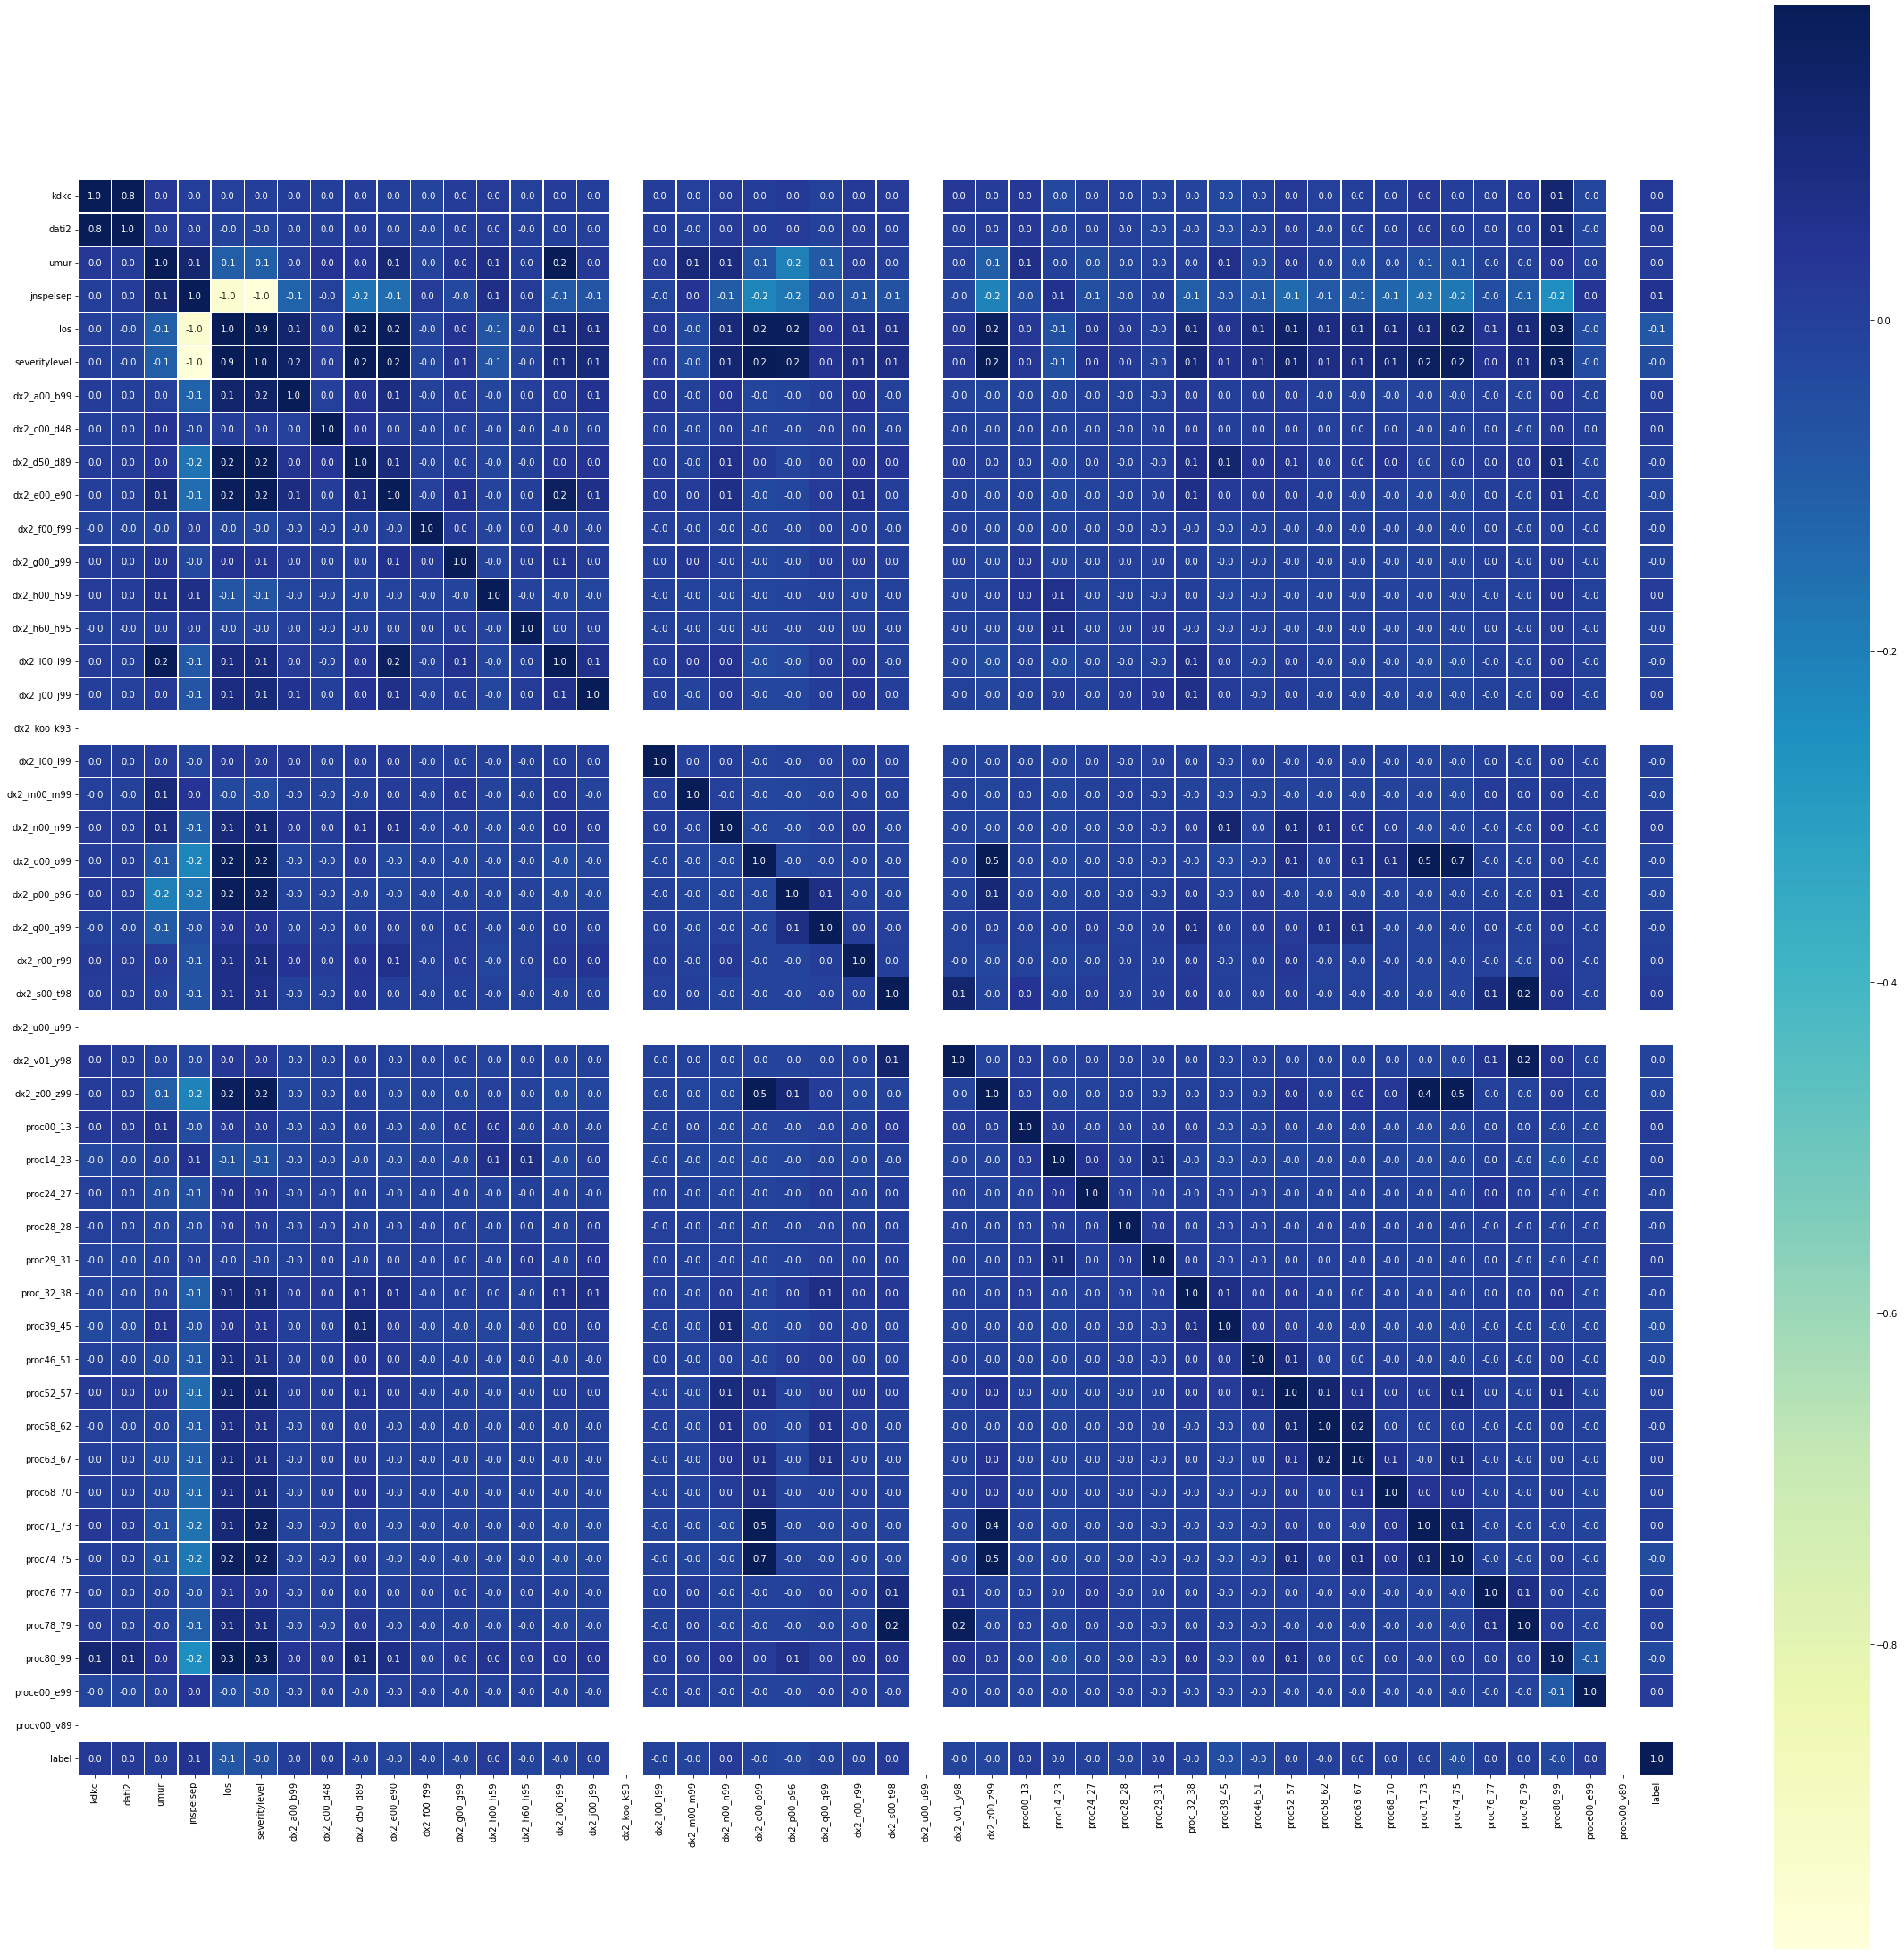

In [ ]:
#seeing correlation between the attributes
import matplotlib
import seaborn as sns

SpearmanCorr = df.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(40,40))
sns.heatmap(SpearmanCorr, vmax=.19, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

### Persebaran Data

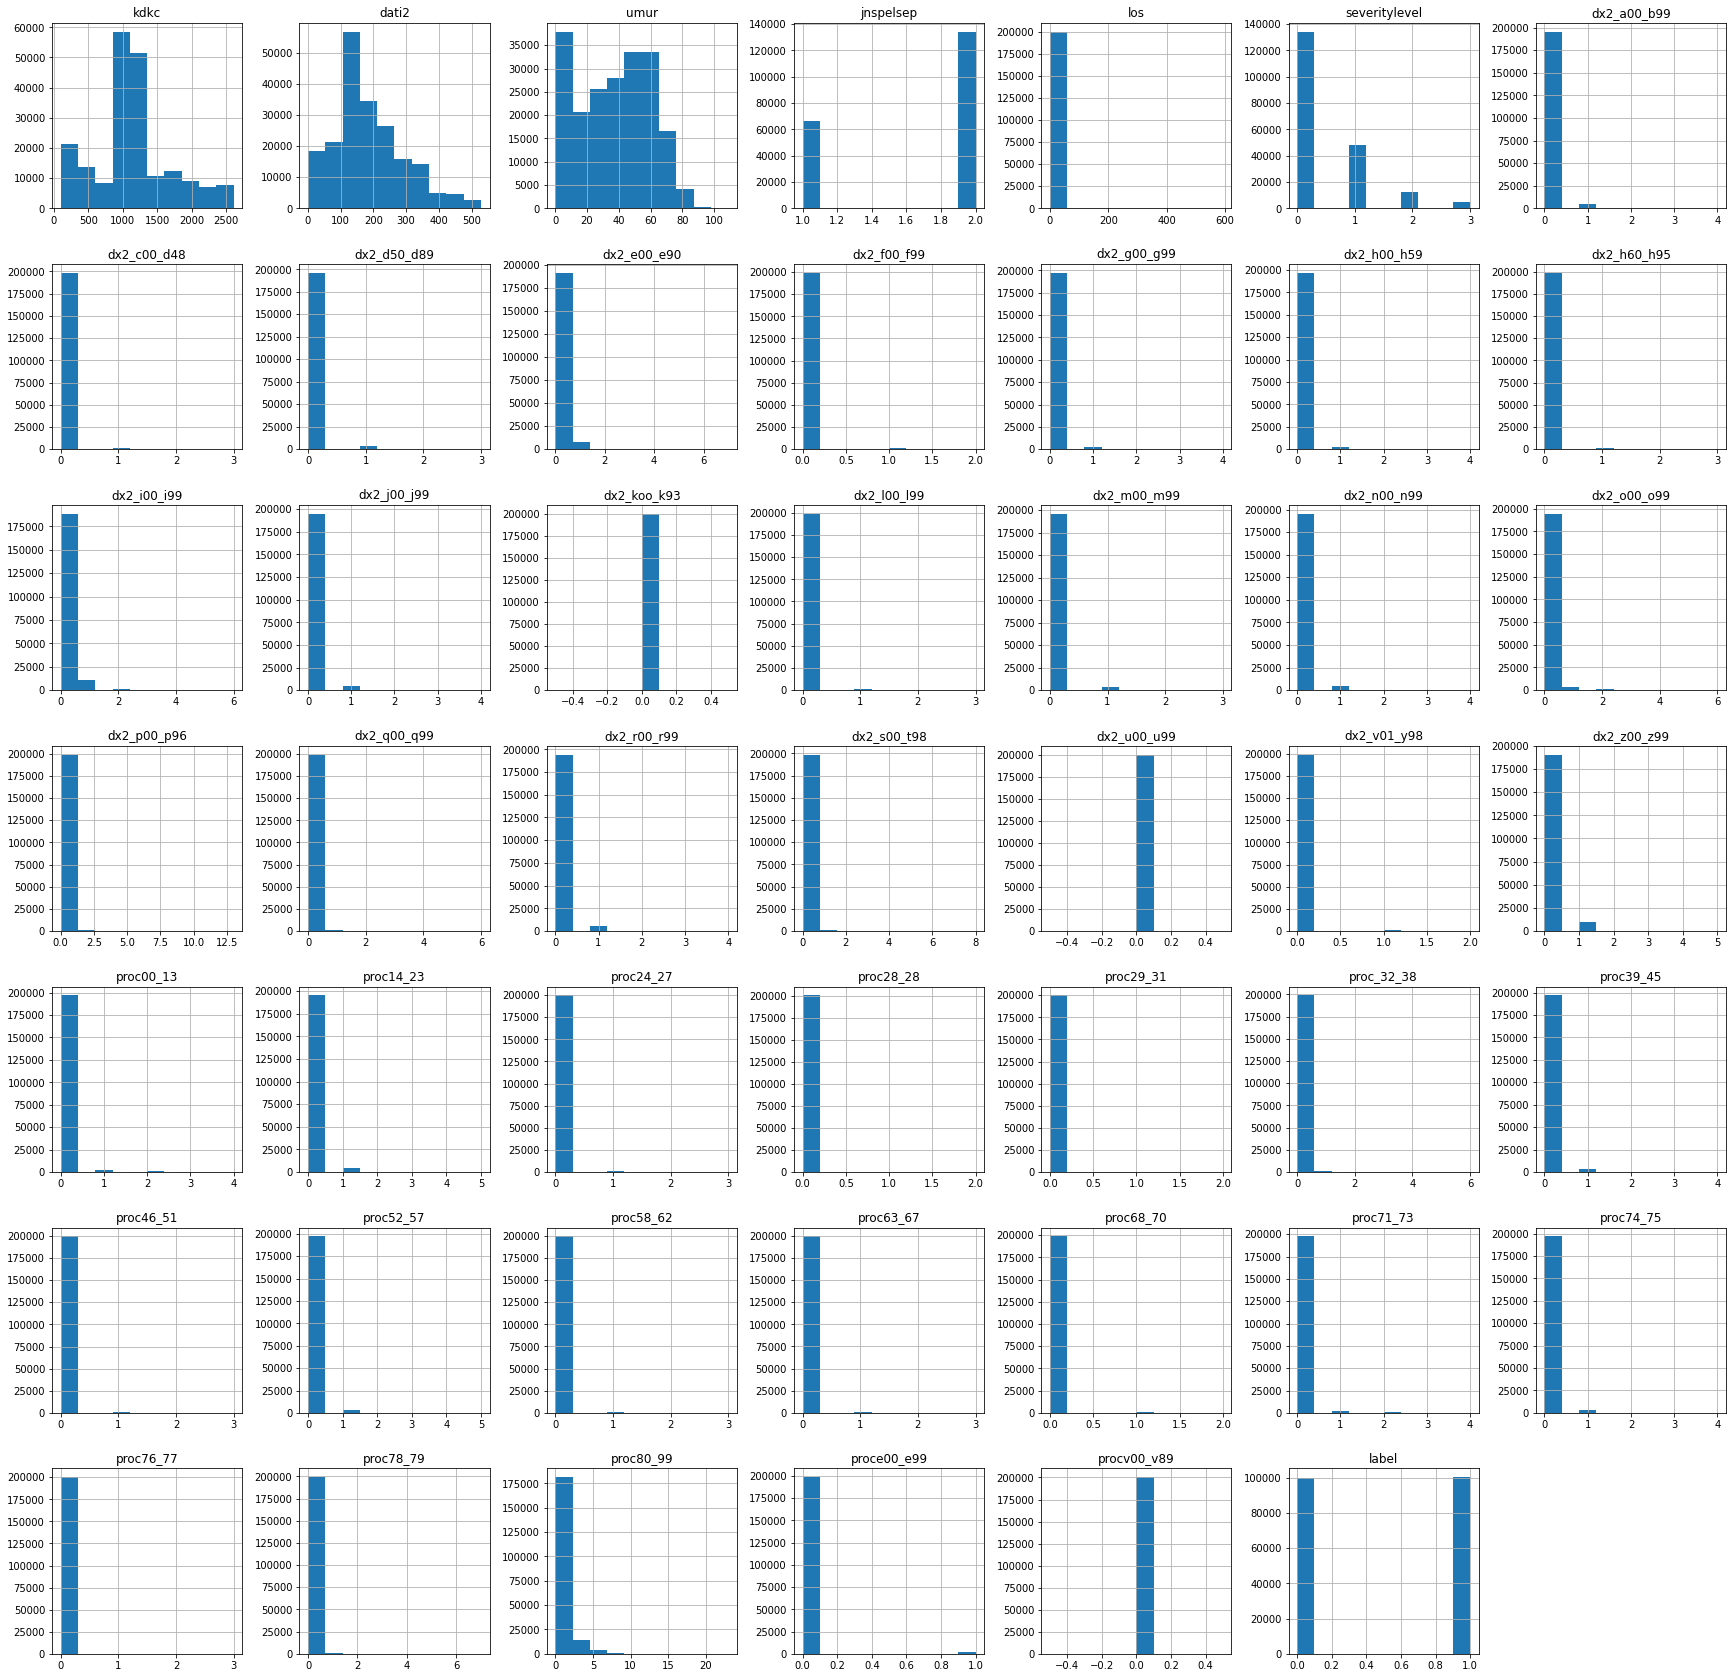

In [ ]:
# menampilkan histogram untuk semua atribut

import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# menampilkan distribusi variabel dengan menggunakan plot histogram
df.hist(figsize=(30, 30))
plt.show()

### Membersihkan Data

### Cek Null Values

In [ ]:
Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


### Cek Outliers

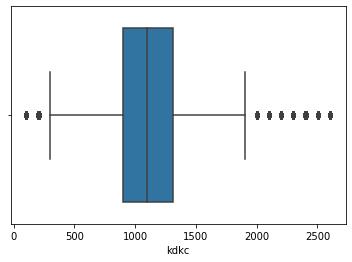

In [ ]:
import seaborn as sns

sns.boxplot(x=df['kdkc'])

In [ ]:
print(np.where(df['kdkc']>2000))

(array([     7,     10,     45, ..., 200190, 200204, 200212]),)


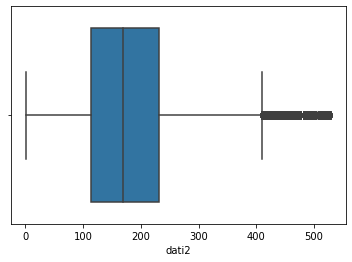

In [ ]:
sns.boxplot(x=df['dati2'])

In [ ]:
print(np.where(df['dati2']>10))

(array([     0,      1,      2, ..., 200214, 200215, 200216]),)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

kdkc             411.0
dati2            118.0
umur              38.0
jnspelsep          1.0
los                2.0
severitylevel      1.0
dx2_a00_b99        0.0
dx2_c00_d48        0.0
dx2_d50_d89        0.0
dx2_e00_e90        0.0
dx2_f00_f99        0.0
dx2_g00_g99        0.0
dx2_h00_h59        0.0
dx2_h60_h95        0.0
dx2_i00_i99        0.0
dx2_j00_j99        0.0
dx2_koo_k93        0.0
dx2_l00_l99        0.0
dx2_m00_m99        0.0
dx2_n00_n99        0.0
dx2_o00_o99        0.0
dx2_p00_p96        0.0
dx2_q00_q99        0.0
dx2_r00_r99        0.0
dx2_s00_t98        0.0
dx2_u00_u99        0.0
dx2_v01_y98        0.0
dx2_z00_z99        0.0
proc00_13          0.0
proc14_23          0.0
proc24_27          0.0
proc28_28          0.0
proc29_31          0.0
proc_32_38         0.0
proc39_45          0.0
proc46_51          0.0
proc52_57          0.0
proc58_62          0.0
proc63_67          0.0
proc68_70          0.0
proc71_73          0.0
proc74_75          0.0
proc76_77          0.0
proc78_79  

In [ ]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

          cmg  dati2  diagprimer  ...  severitylevel  typeppk   umur
0       False  False       False  ...          False    False  False
1       False  False       False  ...          False    False  False
2       False  False       False  ...          False    False  False
3       False  False       False  ...          False    False  False
4       False  False       False  ...          False    False  False
...       ...    ...         ...  ...            ...      ...    ...
200212  False  False       False  ...          False    False  False
200213  False  False       False  ...          False    False  False
200214  False  False       False  ...          False    False  False
200215  False  False       False  ...          False    False  False
200216  False  False       False  ...          False    False  False

[200217 rows x 52 columns]


TypeError: ignored

In [ ]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

TypeError: ignored

### Mengkonstruksi Data

In [ ]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
NumericVariables = list(Integer[Integer].index) 

In [ ]:
## melakukan transformasi dari categorical kedalam numeric

data_kategori = pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
data_numeric = df[NumericVariables]


data_dummies= pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
data_numeric = df[NumericVariables]

data_numeric["id"] = data_numeric.index + 1
data_dummies["id"] = data_dummies.index + 1
data_new = pd.merge(data_numeric,data_dummies ,on="id")
response = ['Response']
VariablesNoTarget = [x for x in data_new.columns if x not in response]
print("Dummy transformation was successful")

Dummy transformation was successful


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data_new.info(200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200217 entries, 0 to 200216
Data columns (total 120 columns):
 #   Column              Dtype
---  ------              -----
 0   kdkc                int64
 1   dati2               int64
 2   umur                int64
 3   jnspelsep           int64
 4   los                 int64
 5   severitylevel       int64
 6   dx2_a00_b99         int64
 7   dx2_c00_d48         int64
 8   dx2_d50_d89         int64
 9   dx2_e00_e90         int64
 10  dx2_f00_f99         int64
 11  dx2_g00_g99         int64
 12  dx2_h00_h59         int64
 13  dx2_h60_h95         int64
 14  dx2_i00_i99         int64
 15  dx2_j00_j99         int64
 16  dx2_koo_k93         int64
 17  dx2_l00_l99         int64
 18  dx2_m00_m99         int64
 19  dx2_n00_n99         int64
 20  dx2_o00_o99         int64
 21  dx2_p00_p96         int64
 22  dx2_q00_q99         int64
 23  dx2_r00_r99         int64
 24  dx2_s00_t98         int64
 25  dx2_u00_u99         int64
 26  dx2_v01_y98    

In [ ]:
data_new.head(100)

,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,...,cmg_E,cmg_F,cmg_G,cmg_H,cmg_I,cmg_J,cmg_K,cmg_L,cmg_M,cmg_N,cmg_O,cmg_P,cmg_Q,cmg_S,cmg_T,cmg_U,cmg_V,cmg_W,cmg_Z,diagprimer_a00_b99,diagprimer_c00_d48,diagprimer_d50_d89,diagprimer_e00_e90,diagprimer_f00_f99,diagprimer_g00_g99,diagprimer_h00_h59,diagprimer_h60_h95,diagprimer_i00_i99,diagprimer_j00_j99,diagprimer_k00_k93,diagprimer_l00_l99,diagprimer_m00_m99,diagprimer_n00_n99,diagprimer_o00_o99,diagprimer_p00_p96,diagprimer_q00_q99,diagprimer_r00_r99,diagprimer_s00_t98,diagprimer_u00_u85,diagprimer_z00_z99
0,1107,150,64,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1303,200,45,1,9,3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1114,172,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,601,90,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1006,130,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,201,38,13,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
96,1004,470,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,602,110,41,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,1009,121,29,1,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Melakukan pengecekan dan menghitung jumlah nilai null pada dataset. Melalui output dapat dilih bahwa pada data set tidak terdapat nilai null.